## **Блок №1. Базовый уровень**

### **1. Константы**

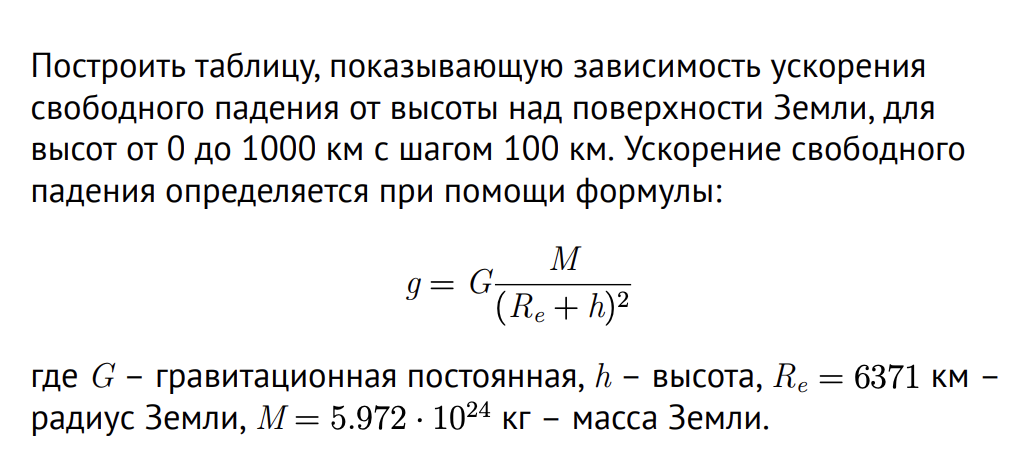

In [5]:
from scipy import *
from scipy import constants
import numpy as np
from numpy import *

def calculate_g(h):
  R = 6371 * 1000 # в метрах
  M = 5.972 * (10** 24) # в кг
  return constants.G * M / (R + h * 1000) ** 2

n = -1
print('\tВысота (км)  Ускорнеие свободного падения (м/с^2)')
for h in range(0, 1001, 100):
  n += 1
  print(f'{n}\t       {h:4.0f}\t\t  \t\t {calculate_g(h):1.6f}')

	Высота (км)  Ускорнеие свободного падения (м/с^2)
0	          0		  		 9.819973
1	        100		  		 9.518811
2	        200		  		 9.231294
3	        300		  		 8.956610
4	        400		  		 8.694005
5	        500		  		 8.442783
6	        600		  		 8.202294
7	        700		  		 7.971937
8	        800		  		 7.751149
9	        900		  		 7.539408
10	       1000		  		 7.336226


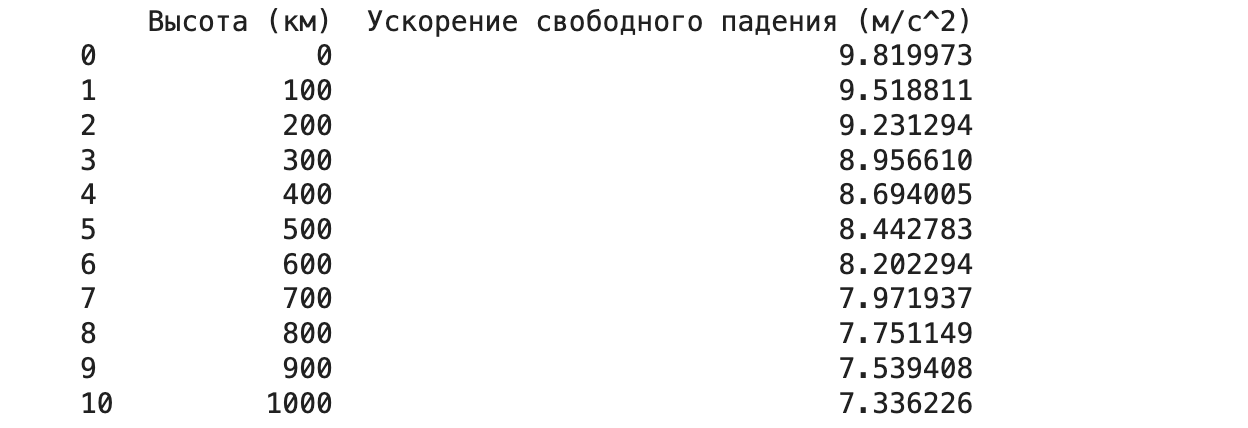

### **2. Линейная алгебра**

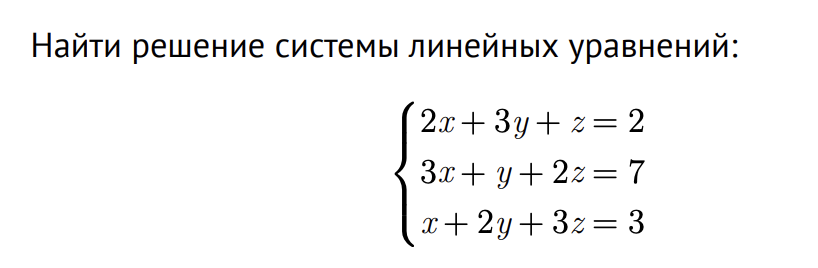

In [6]:
A = np.array([[2, 3, 1],
              [3, 1, 2],
              [1, 2, 3]])

b = np.array([2,
              7,
              3])

result = linalg.solve(A, b)
print(result)

[ 2. -1.  1.]


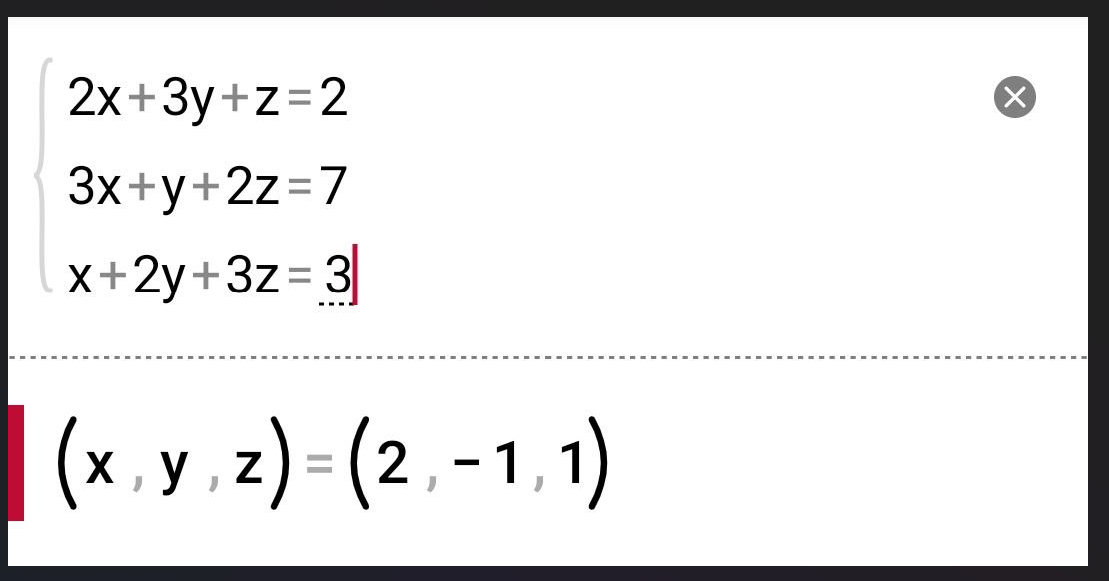

![photo_8_2024-03-21_11-02-34.jpg](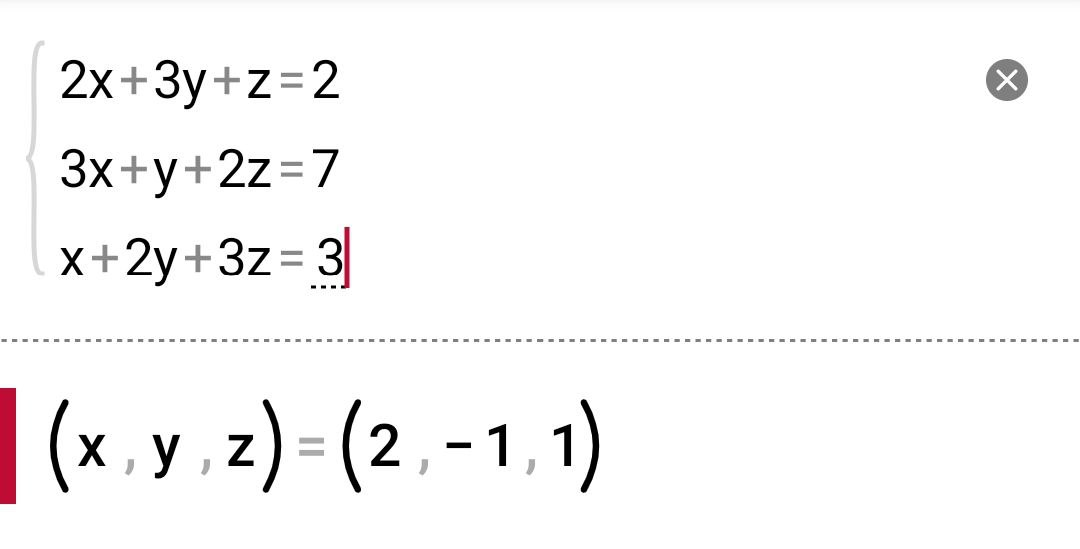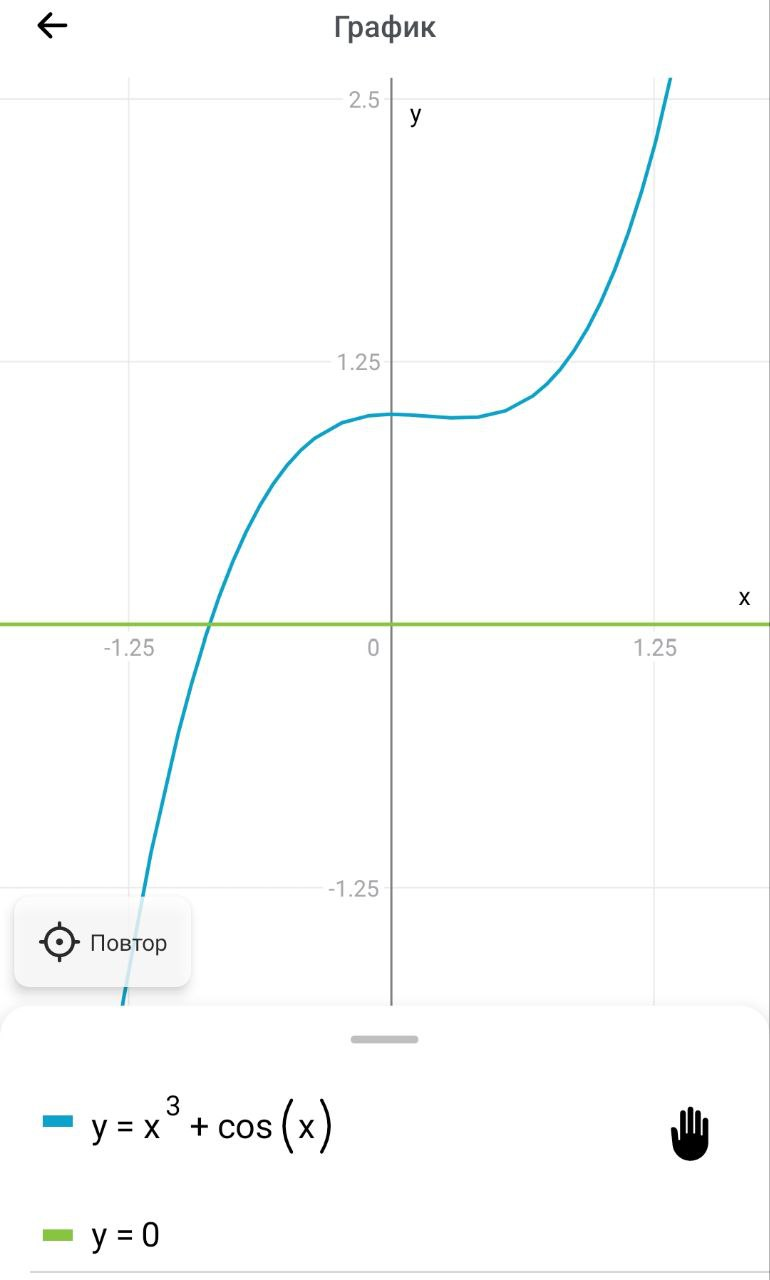)

### **3. Интегрирование**

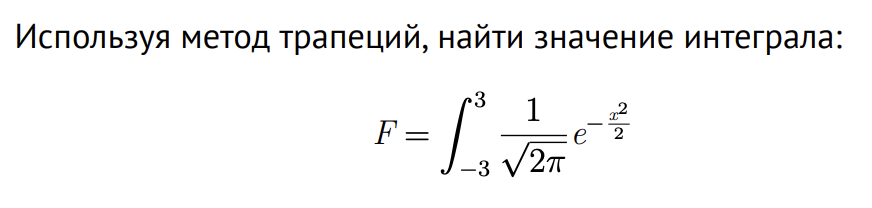

In [7]:
def integral_v(x):
  return (1 / (sqrt(2 * constants.pi))) * constants.e ** (-(x ** 2 / 2))


x = linspace(-3, 3, 1000)
y = integral_v(x)
result = trapz(y, x)
print('Значение интеграла -',result)

Значение интеграла - 2.4529125940910282e+82


### **4. Методы оптимизации. Поиск корней уравнения**

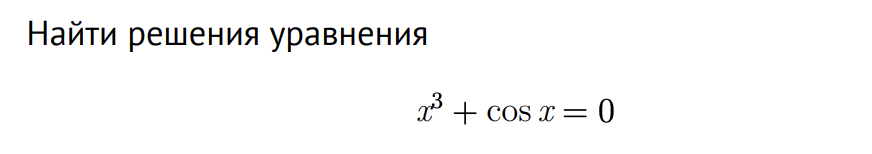

**Сделайте это разными способами, постройте график функции**

<ipython-input-48-1d2662d86077>:11: OptimizeWarning: Unknown solver options: maxiter
  result = cpo.root(func, x0, method=method, options=dict(maxiter=1000))


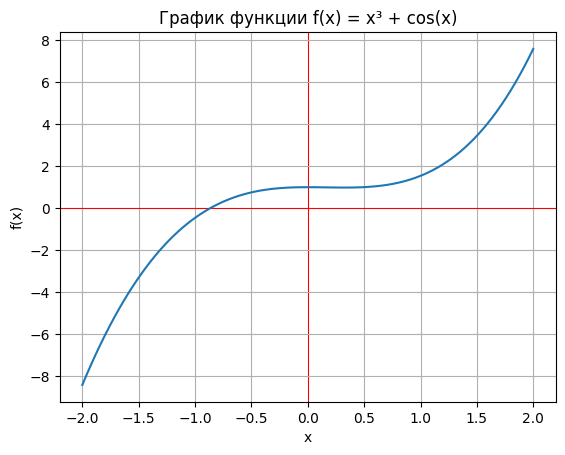

Корни уравнения: [-0.86547403] [-0.86547403] -0.8654740580120569 -0.8654740580120569 -0.8654749337344669 -148.4569229219582 -0.8654740580120569 -115.59942454097498 -0.8654740759560807 -0.865474032206756


In [48]:
import scipy.optimize as cpo
import matplotlib.pyplot as plt
def func(x):
  return x ** 3 + np.cos(x)

methods = ['hybr', 'lm', 'broyden1', 'broyden2','anderson','linearmixing',
           'diagbroyden','excitingmixing','krylov', 'df-sane']
solves = []
for method in methods:
  x0 = -1
  result = cpo.root(func, x0, method=method, options=dict(maxiter=1000))
  solves.append(result.x)

dx = np.linspace(-2, 2, 100)
dy = func(dx)

fig, ax = plt.subplots()
ylines = ax.yaxis.get_gridlines()
ylines[5].set_linewidth(0.8)
ylines[5].set_color('red')
xlines = ax.xaxis.get_gridlines()
xlines[5].set_color('red')
plt.plot(dx, dy)

plt.title('График функции f(x) = x³ + cos(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.grid(True)
plt.show()
print(f'Корни уравнения:',*solves)

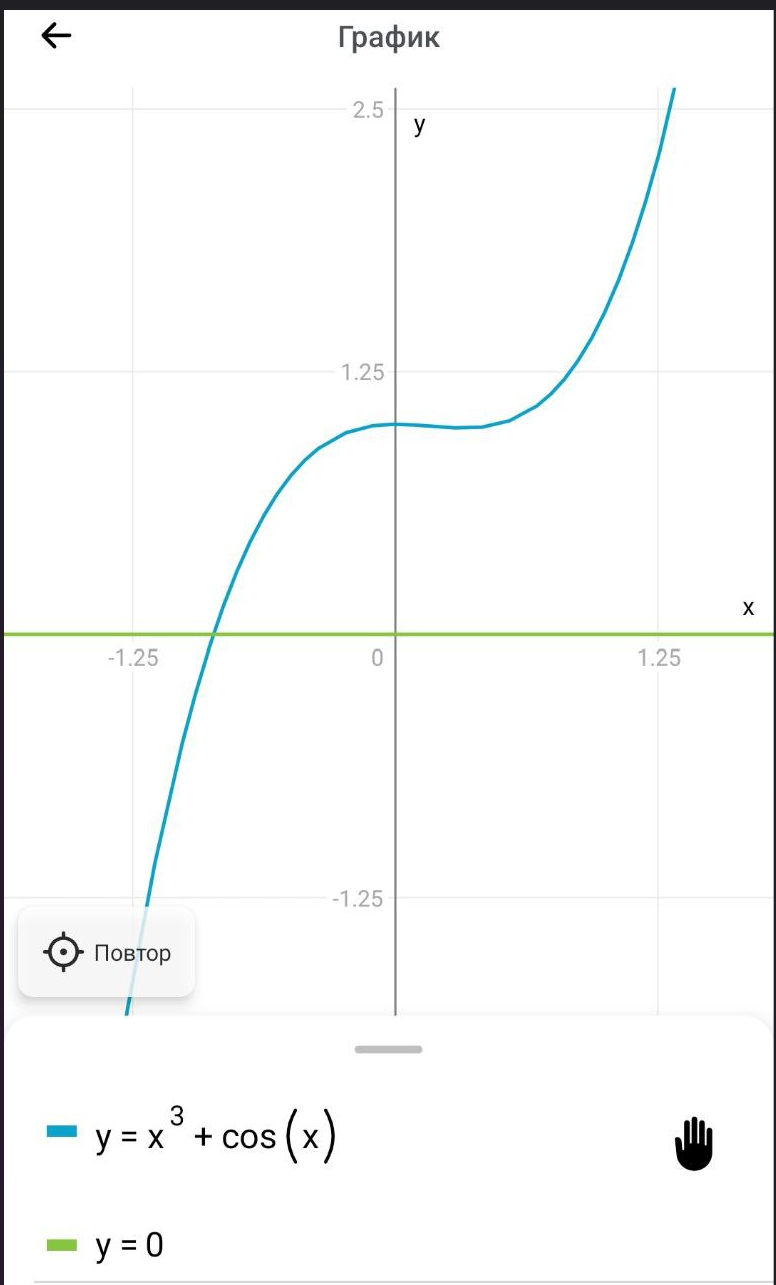

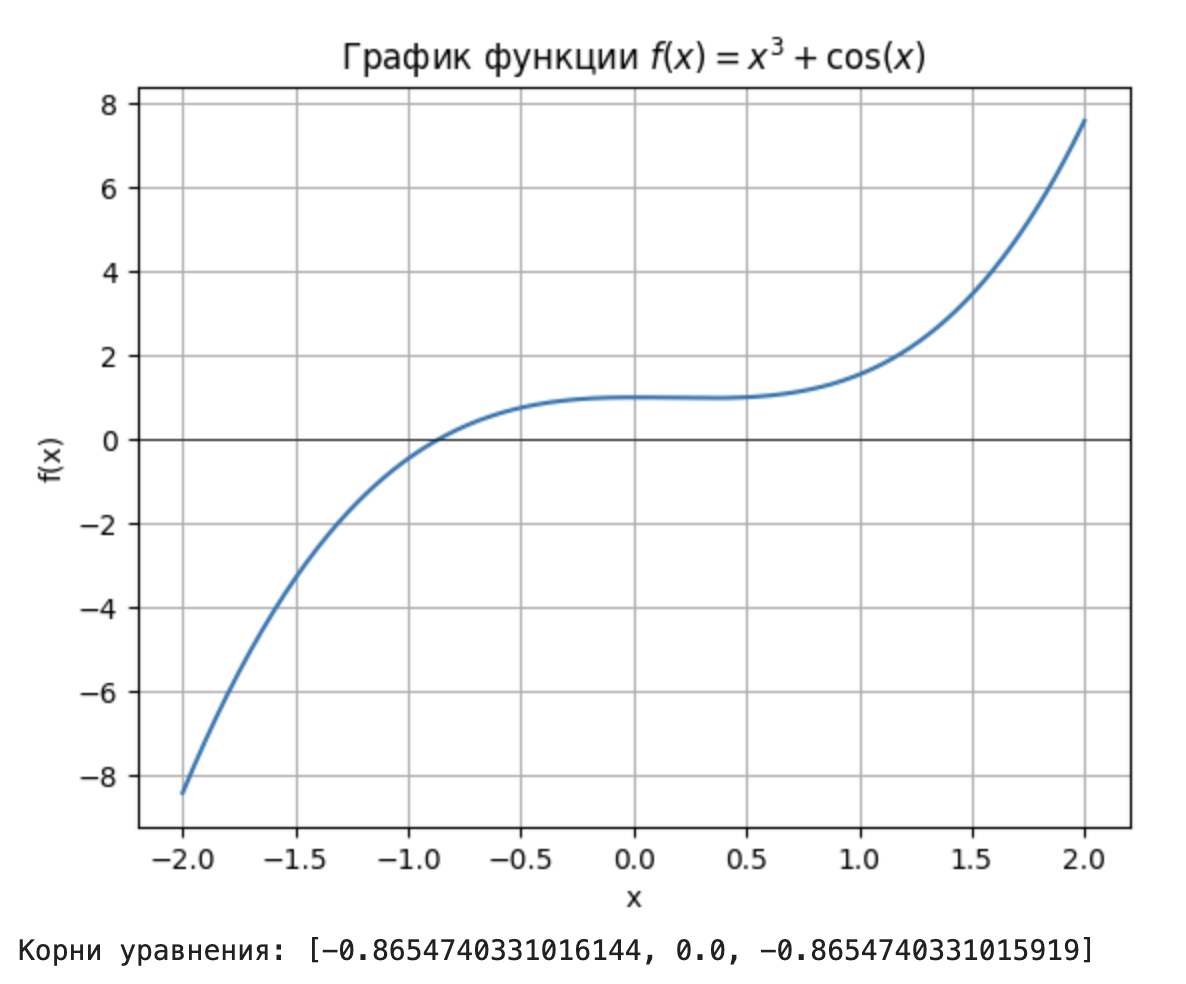

In [ ]:
# Ваш код

### **5. Методы оптимизации. Поиск минимума**

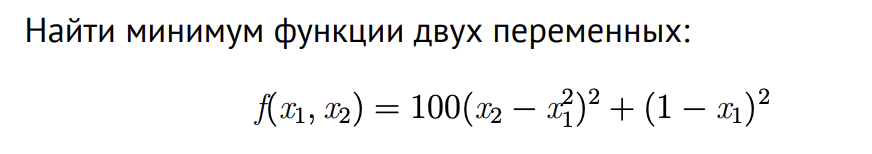

In [15]:
from scipy import *
from scipy.optimize import *
def func(x):
  return 100 * ((x[1] - (x[0] ** 2)) ** 2) + ((1 - x[0]) ** 2)

input_data = np.array([1, 1])
grid = (-100, 100, 0.1)
result = minimize(func, input_data)
val, x12 = result.fun, result.x
print(f'MIN занчение функци =  {val}  при х  =  {x12}')

MIN занчение функци =  0.0  при х  =  [1. 1.]


## **Блок №2. Повышенный уровень**

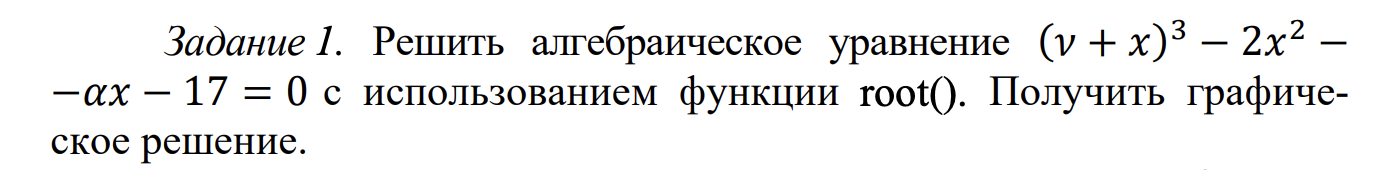

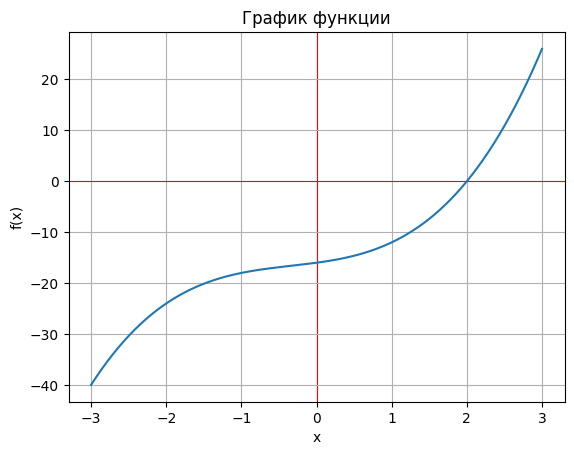

корень уравнения - [2.]


In [50]:
def func(x, nu=1, alpha=1):
  func_eq = (nu + x) ** 3 - 2 * (x ** 2) - alpha  * x - 17
  return func_eq

x0 = -1
result1 = cpo.root(func, x0)

dx = np.linspace(-3, 3, 1000)
dy = func(dx)

fig, ax = plt.subplots()
ylines = ax.yaxis.get_gridlines()
ylines[5].set_linewidth(0.8)
ylines[5].set_color('red')
xlines = ax.xaxis.get_gridlines()
xlines[4].set_color('red')
plt.plot(dx, dy)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции')
plt.grid(True)
plt.show()
print('корень уравнения -', result1.x)

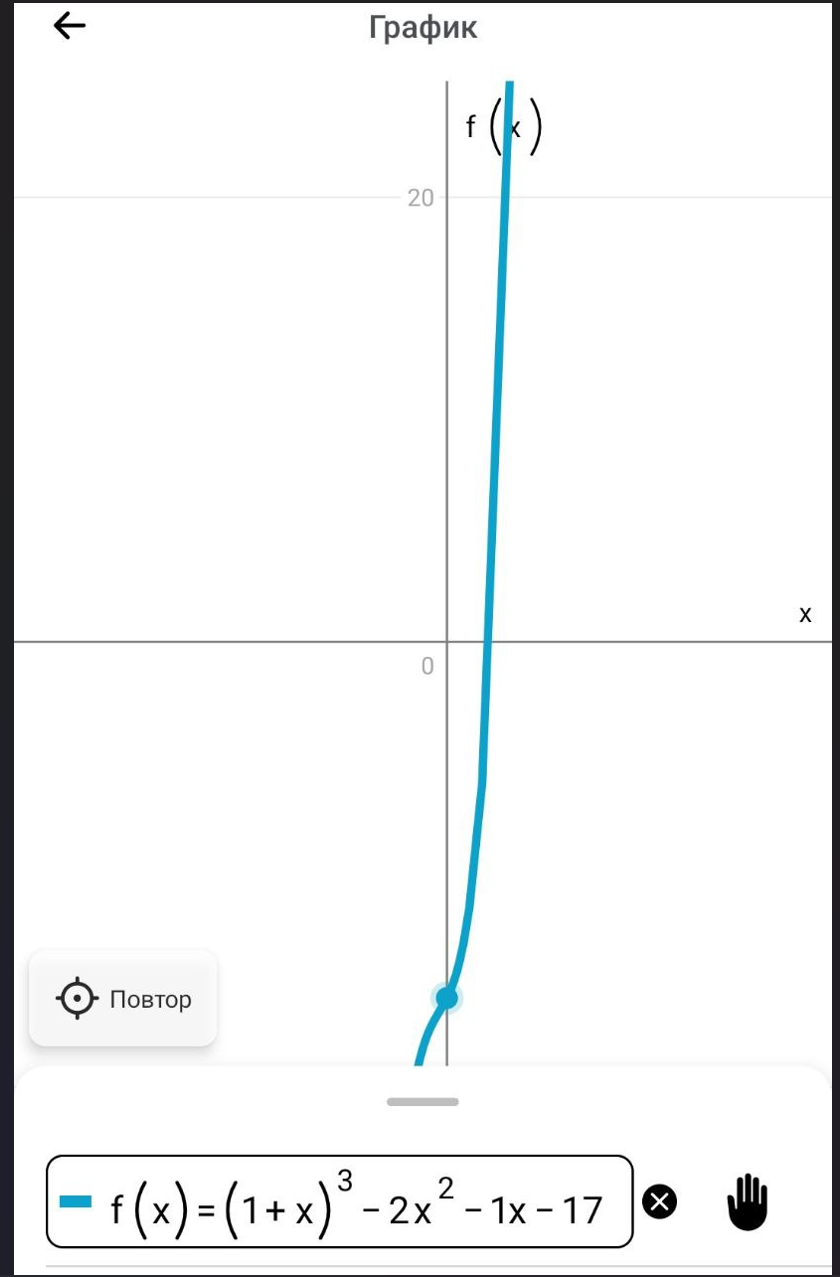

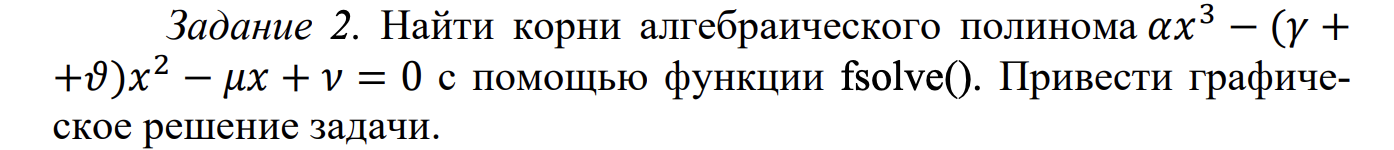

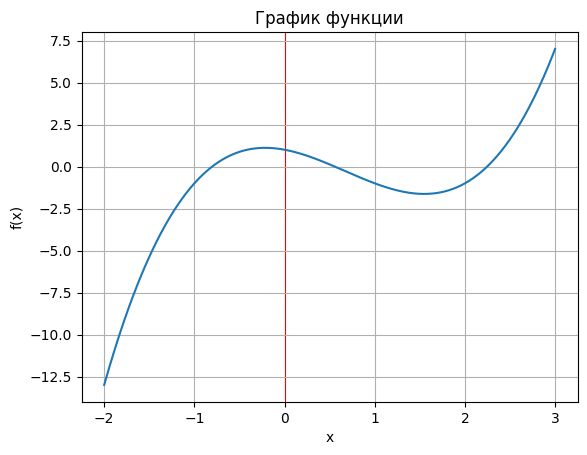

Корни уравнения - [-0.80193774  0.55495813  2.2469796 ]


In [59]:
def func(x, nu=1, alpha=1, mu=1, gamma=1, epsilon=1):
  func_eq = (alpha * x ** 3) - (gamma + epsilon) * (x ** 2) - mu * x + nu
  return func_eq


dx = np.linspace(-2, 3, 1000)
dy = func(dx)
fig, ax = plt.subplots()
#ylines = ax.yaxis.get_gridlines()
#ylines[-5].set_color('red')

xlines = ax.xaxis.get_gridlines()
xlines[3].set_color('red')

plt.plot(dx, dy)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции')
plt.grid(True)
plt.show()
x0 = [-1, 0.5, 2]

result = cpo.fsolve(func, x0)
print('Корни уравнения -', result)

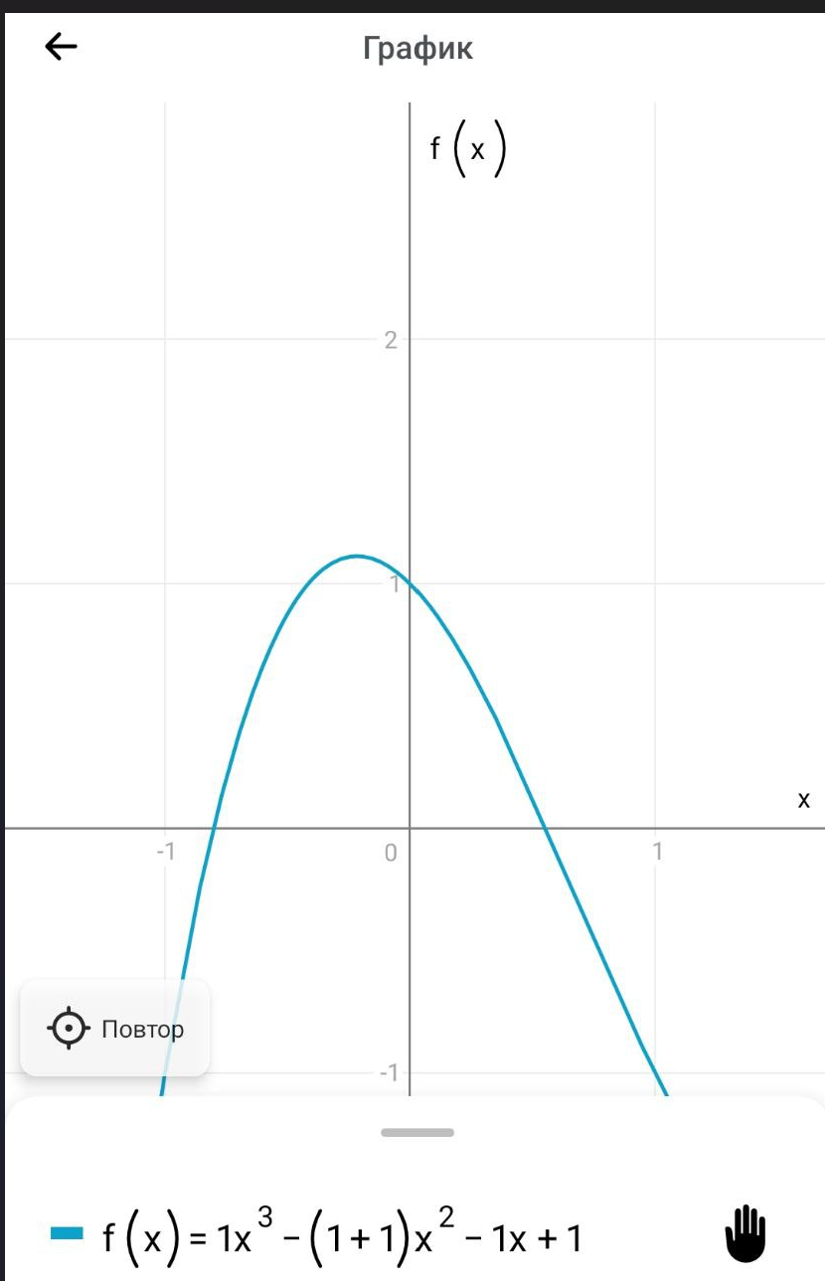

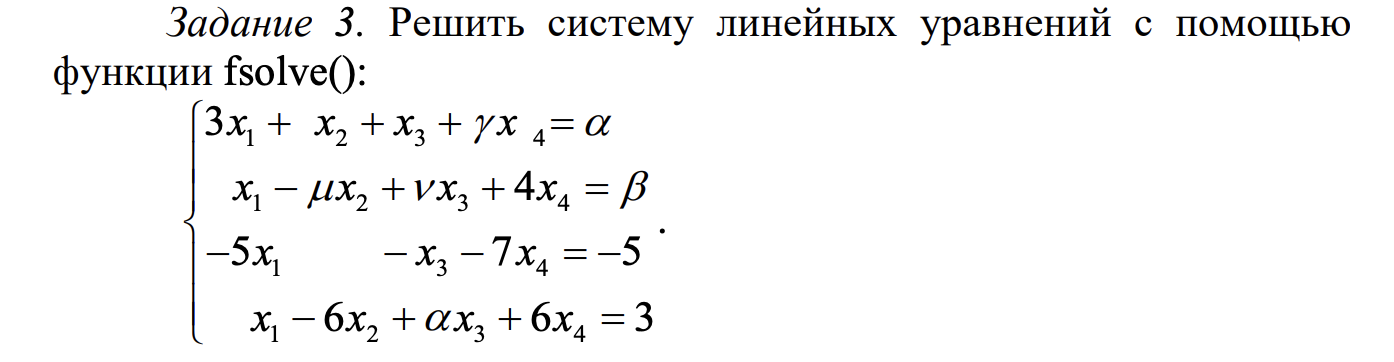

In [25]:
def func(z,  nu=1, alpha=1,betta=1, mu=1, gamma=1, epsilon=1):
  x1, x2, x3, x4 = z[0], z[1], z[2], z[3]
  syst_eq = [3 * x1 + x2 + x3  + gamma * x4 - alpha,
          x1 - mu * x2 + nu * x3 + 4 * x4 - betta,
          -5 * x1 - x3 - 7 * x4 + 5,
          x1 - 6 * x2 + alpha * x3 + 6 * x4 - 3]
  return syst_eq

result = cpo.fsolve(func, [0, 0, 0, 0])
print(result)


[ 0.79487179 -0.25641026 -1.48717949  0.35897436]


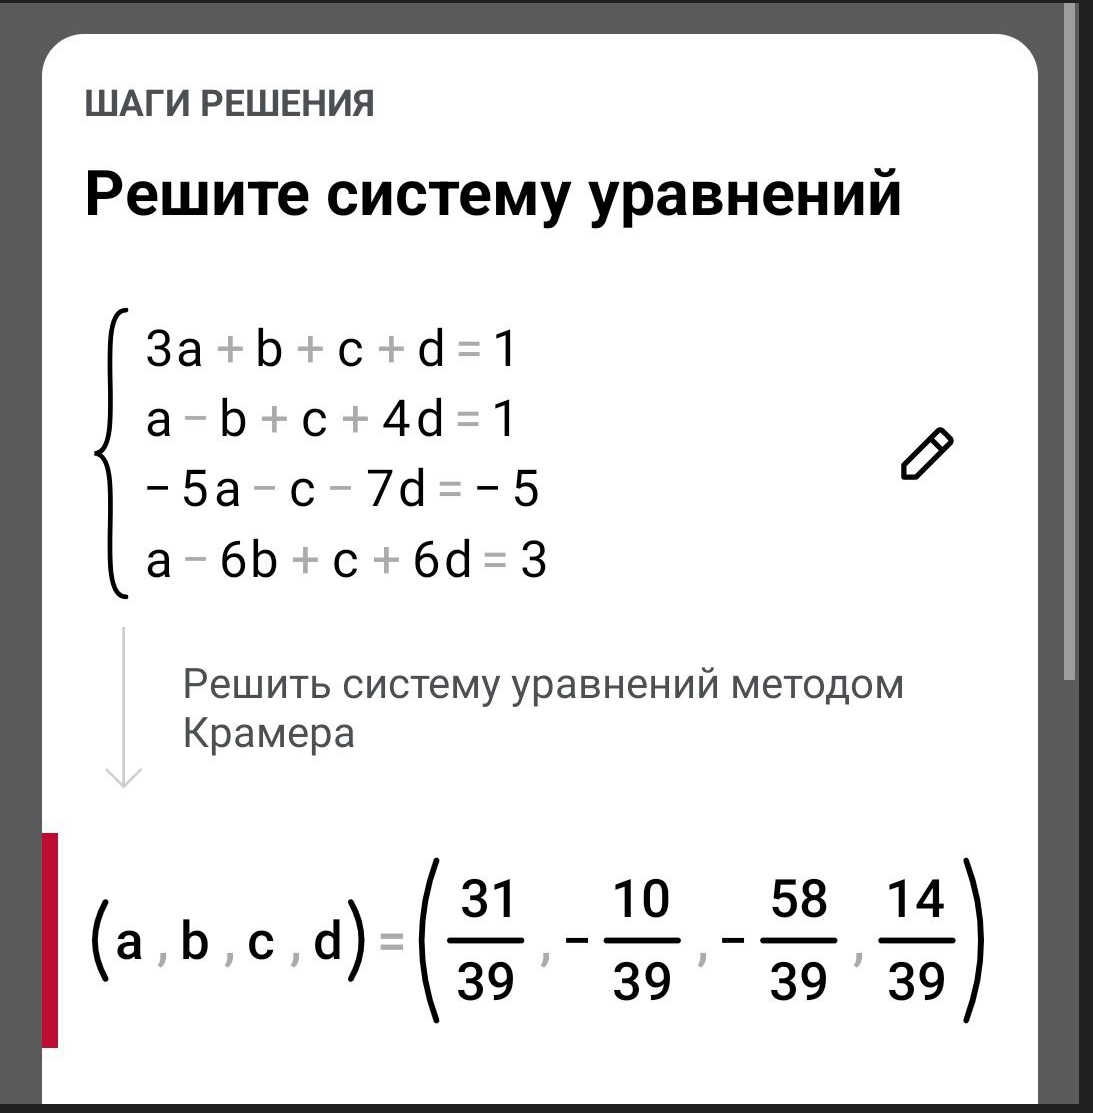

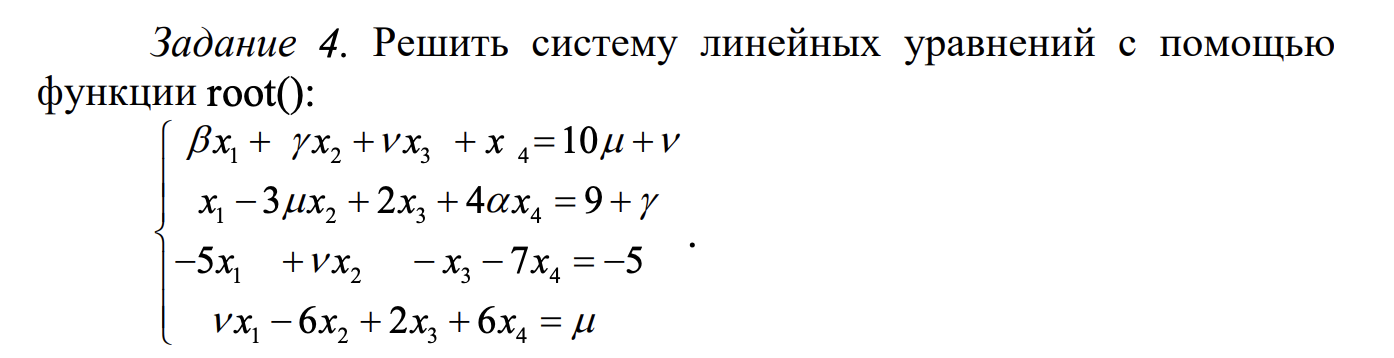

In [27]:
def func(z,  nu=1, alpha=1,betta=1, mu=1, gamma=1, epsilon=1):
  x1, x2, x3, x4 = z[0], z[1], z[2], z[3]
  func_v = [betta * x1 + gamma * x2 + nu * x3  + x4 - 10 * mu - nu,
          x1 - 3 * mu * x2 + 2 * x3 + 4 * alpha * x4 - 9 - gamma,
          -5 * x1 + nu * x2 - x3 - 7 * x4 + 5,
          nu * x1 - 6 * x2 + 2 * x3 + 6 * x4 - mu]
  return func_v

result = cpo.root(func, [0, 0, 0, 0])
print(result.x)


[ 21.  -9.  17. -18.]


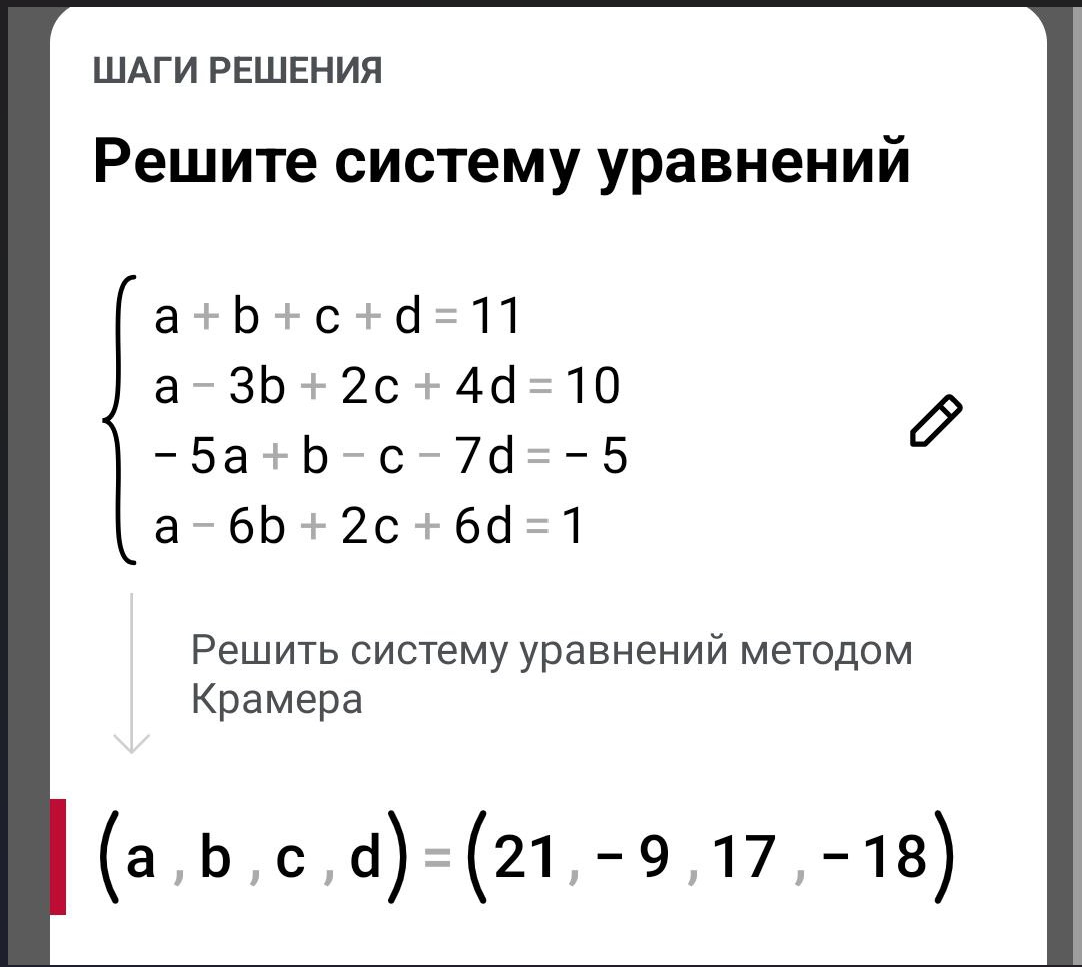

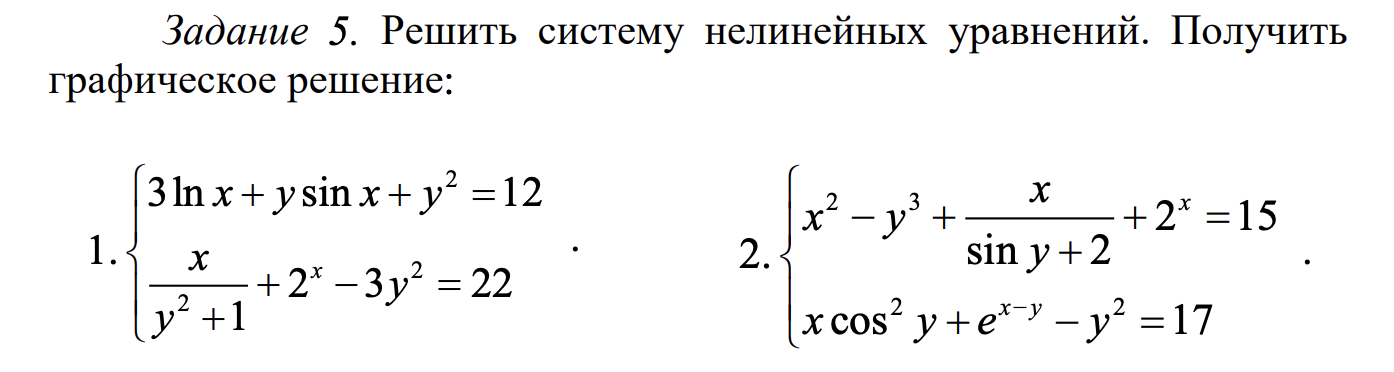

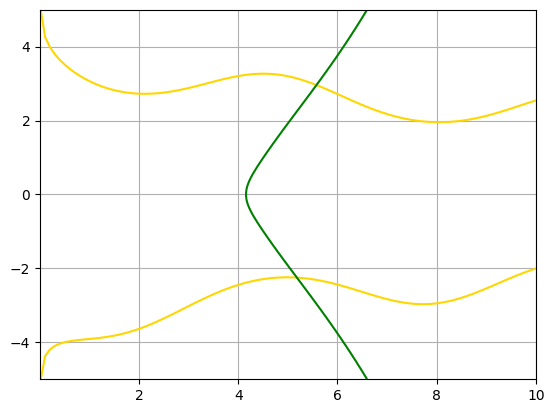

 1. корни - [5.5767428  2.96076171]



In [64]:
def func1(z):
  x, y = z[0], z[1]
  func1_v = [3 * np.log(x) + y * np.sin(x) + (y ** 2) - 12,
          (x / (y ** 2 + 1)) + 2 ** x - 3 * (y ** 2) - 22]

  return func1_v


def main(func , a, b, c, d):
  alpha = 0.7
  x, y = np.meshgrid(np.linspace(a , b, 100), np.linspace(c, d, 100))
  z = np.array(func([x, y]))
  plt.contour(x, y, z[0], [0], colors='gold')
  plt.contour(x, y, z[1], [0], colors='green')
  ylines = ax.yaxis.get_gridlines()
  ylines[0].set_color('red')
  xlines = ax.xaxis.get_gridlines()
  xlines[0].set_color('red')
  plt.grid()
  plt.show()


  root1 = cpo.root(func, [2, 0], method='lm', options=dict(maxiter=1000))

  print(f' 1. корни - {root1.x}')



main(func1, 0.01, 10, -5, 5)
print()


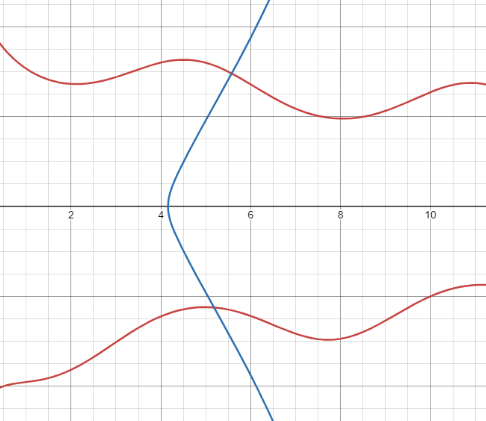

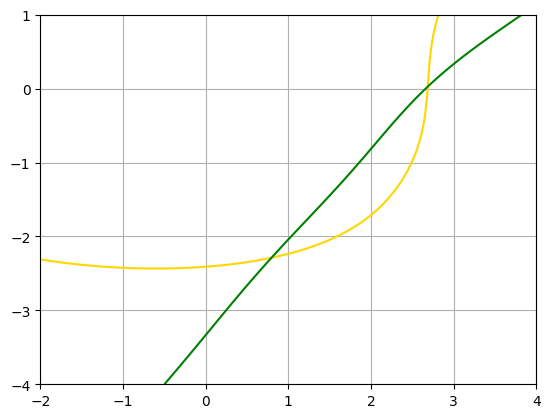

 2. корни  - [ 0.79761132 -2.28852616]


In [61]:

def func2(z):
  x, y = z[0], z[1]
  func2_v = [(x ** 2) - (y ** 3) + (x / (np.sin(y) + 2)) + (2 ** x) - 15,
          x * (np.cos(y) ** 2) + np.exp(1) ** (x - y) - (y ** 2) - 17]

  return func2_v

def main(func , a, b, c, d):
  alpha = 0.7
  x, y = np.meshgrid(np.linspace(a , b, 100), np.linspace(c, d, 100))
  z = np.array(func([x, y]))
  plt.contour(x, y, z[0], [0], colors='gold')
  plt.contour(x, y, z[1], [0], colors='green')
  plt.grid()
  plt.show()


  root2 = cpo.root(func, [1, -2], method='lm', options=dict(maxiter=1000))
  print(f' 2. корни  - {root2.x}')




main(func2, -2, 4, -4, 1)


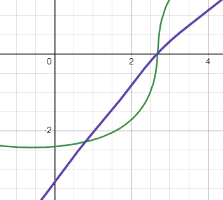

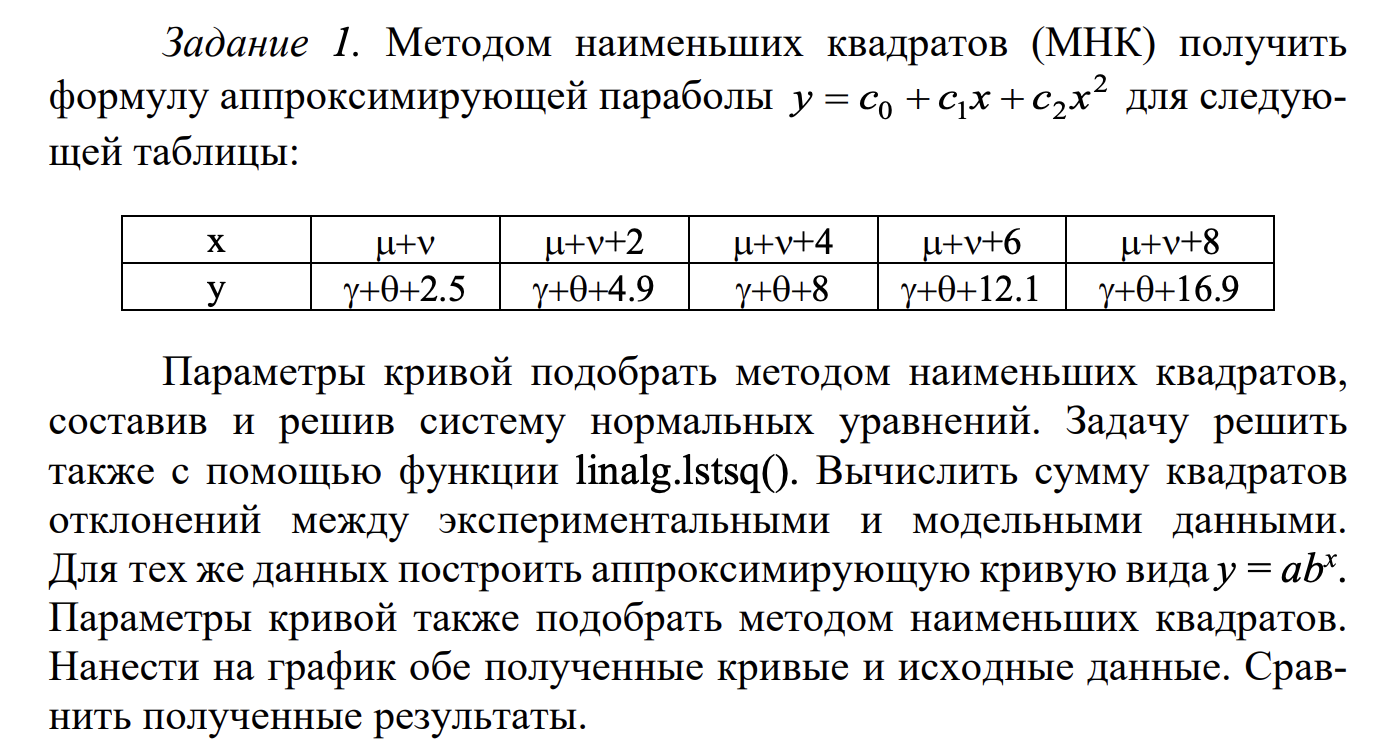

**Ход работы:**

1. **Определение переменных**: Определяем переменные $ \mu $, $ \nu $, и $ \gamma $, которые будут использоваться в наших уравнениях.

3. **Создание массивов данных**: Создаем два массива: `x_values` и `y_values`. `x_values` содержит значения $ x $, которые мы получаем, добавляя к $ \mu + \nu $ числа от 0 до 8 с шагом 2. `y_values` содержит соответствующие значения $ y $, которые мы также вычисляем, используя заданные значения $ \gamma $ и добавляя к нему разные числа.

4. **Подготовка матрицы коэффициентов**: Создаем матрицу `A`, которая будет использоваться для нахождения коэффициентов нашей параболы. Каждая строка матрицы `A` представляет собой значения $ 1 $, $ x $, и $ x^2 $ для каждого значения из `x_values`.

5. **Решение методом наименьших квадратов**: Функция `lstsq` принимает нашу матрицу `A` и массив `y_values`, и находит коэффициенты $ c_0 $, $ c_1 $, и $ c_2 $, которые минимизируют разницу между фактическими значениями $ y $ и значениями, предсказанными нашей параболой.

6. **Вывод результатов**: В конце мы выводим найденные коэффициенты и сумму квадратов отклонений, которая показывает, насколько хорошо наша парабола соответствует данным.

Сумма квадратов отклонения - 0.005142857142857014


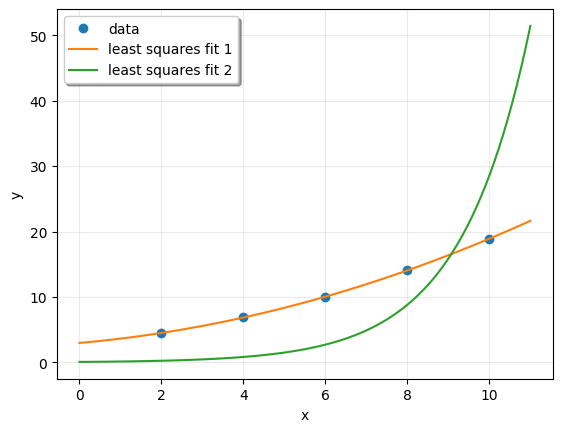

In [31]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

nu, mu, gamma, fita = 1, 1, 1, 1 # Определяем переменные  μ ,  ν , и  γ , которые будут использоваться в наших уравнениях.
# Создаем два массива: x_values и y_values
x_values = np.array([nu + mu + i for i in range(0, 9, 2)])
y_values = np.array([2.5, 4.9, 8.0, 12.1, 16.9]) + fita + gamma

# Подготовка матрицы коэффициентов
A = np.column_stack((np.ones(len(x_values)), x_values, x_values**2, ))
B = np.column_stack((np.ones(len(x_values)), x_values, ))

# Решение методом наименьших квадратов
p, res, rnk, s = lstsq(A, y_values)
p1, res1, rnk1, s1 = lstsq(B, y_values)

print(f'Сумма квадратов отклонения - {res}')

# график
xx = np.linspace(0, 11, 101)
yy = p[0] + p[1] * xx + p[2] * (xx ** 2)
yy1 = p1[0]* (p1[1] ** xx)
plt.plot(x_values, y_values, 'o', label='data')
plt.plot(xx, yy, label='least squares fit 1')
plt.plot(xx, yy1, label='least squares fit 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()


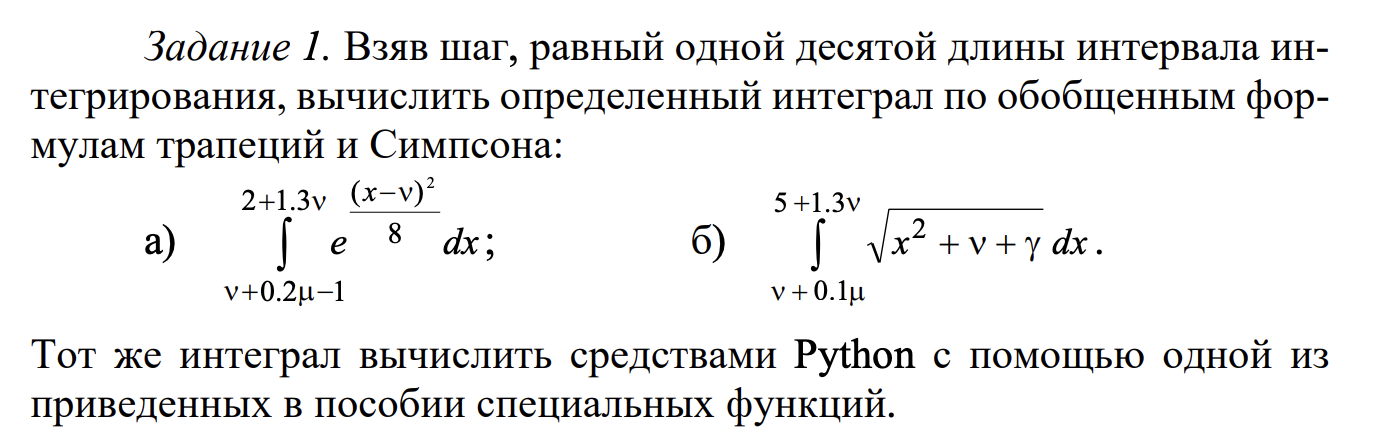

In [32]:
from scipy import integrate
def func1(x, nu=1):
  func1_v = 2.7 ** ((x - nu) ** 2 / 8)
  return func1_v

def trapezoidal_integral(f, a, b, n=10):
  h = (b - a) / n
  integral_res = (f(a) + f(b))  * h / 2
  for i in range(1, n):
    x = a + h * i
    integral_res += f(x) * h
  return integral_res

def simpson_integral(f, a, b, n=10):
    h = (b - a) / n
    s = 0
    for i in range(1, n):
        x = a + i*h
        if i % 2 == 0:
            s += 2 * f(x)
        else:
            s += 4 * f(x)
    simp_int_res = h/3 * (f(a) + s + f(b))
    return simp_int_res

def main(nu=1, mu=1):
  a1 = nu + 0.2 * mu - 1
  b1 = 2 + 1.3 * nu
  x1 = np.linspace(a1, b1, num=2 ** 3 + 1)
  y1 = func1(x1)
  romb_result = integrate.romb(y1, dx=(x1[1] - x1[0]))
  print('a)')
  print(f'Обобщенным методом трапеции - {trapezoidal_integral(func1, a1, b1)}')
  print(f'Обобщенным методом Симпсона - {simpson_integral(func1, a1, b1)}')
  print(f'Методом ромберга - {romb_result}')
  print()

main()


Функция 1:
Обобщенным методом трапеции - 3.752713470678792
Обобщенным методом Симпсона - 3.742255359265642
Методом ромберга - 3.7421918929586275



In [34]:
def func2(x, nu=1, gamma=1):
  func2_v = np.sqrt(x ** 2 + nu + gamma)
  return func2_v


def trapezoidal_integral(f, a, b, n=10):
  h = (b - a) / n
  integral_res = (f(a) + f(b))  * h / 2
  for i in range(1, n):
    x = a + h * i
    integral_res += f(x) * h
  return integral_res

def simpson_integral(f, a, b, n=10):
    h = (b - a) / n
    s = 0
    for i in range(1, n):
        x = a + i*h
        if i % 2 == 0:
            s += 2 * f(x)
        else:
            s += 4 * f(x)
    simp_int_res = h/3 * (f(a) + s + f(b))
    return simp_int_res

def main(nu=1, mu=1):
  a2 = nu + 0.1 * mu
  b2 = 5 + 1.3 * nu
  x2 = np.linspace(a2, b2, num=2** 3 + 1)
  y2 = func2(x2)
  romb_result = integrate.romb(y2, dx=(x2[1] - x2[0]))
  print('b)')
  print(f'Обобщенным методом трапеции - {trapezoidal_integral(func2, a2, b2)}')
  print(f'Обобщенным методом Симпсона - {simpson_integral(func2, a2, b2)}')
  print(f'Методом ромберга - {romb_result}')

main()


b)
Обобщенным методом трапеции - 20.8458011176155
Обобщенным методом Симпсона - 20.837829747272206
Методом ромберга - 20.83770844335795


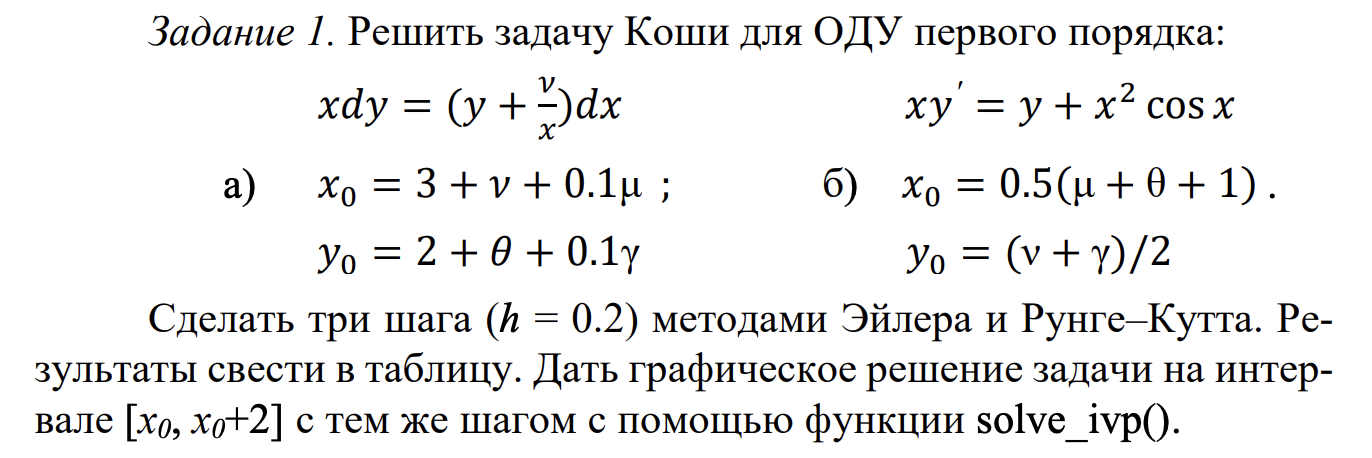

Метод Эйлера:
x = 4.10, y = 3.10
x = 4.30, y = 3.77
x = 4.50, y = 4.56
x = 4.70, y = 5.52

Метод Рунге-Кутты:
x = 4.10, y = 3.10
x = 4.30, y = 3.84
x = 4.50, y = 4.74
x = 4.70, y = 5.84


<ipython-input-69-b69808586beb>:72: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


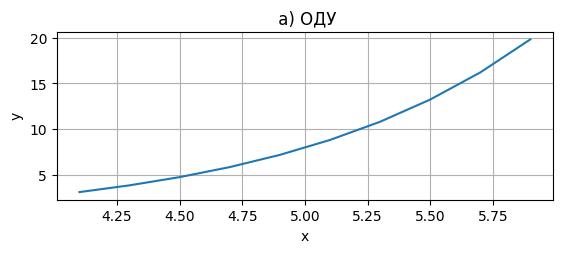

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def func1(x, y, v=1):
  func1_v =  y + v / x
  return func1_v

def euler_method(f, x0, y0, h):
    x_values = [x0]
    y_values = [y0]

    for _ in range(3):
        x0 += h
        y0 += h * f(x0, y0)
        x_values.append(x0)
        y_values.append(y0)

    return x_values, y_values

def run_kut_method(f, x0, y0, h):
    x_values = [x0]
    y_values = [y0]

    for _ in range(3):
        k1 = h * f(x0, y0)
        k2 = h * f(x0 + h / 2, y0 + k1 / 2)
        k3 = h * f(x0 + h / 2, y0 + k2 / 2)
        k4 = h * f(x0 + h, y0 + k3)

        x0 += h
        y0 += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x_values.append(x0)
        y_values.append(y0)

    return x_values, y_values

def solve_with_scipy(f, x0, y0, h):


    t_span = (x0, x0 + 2)
    t_eval = np.arange(x0, x0 + 2, h)
    sol = solve_ivp(f, t_span, [y0], t_eval=t_eval)

    return sol.t, sol.y[0]

v, u, o, j = 1, 1, 1, 1
x0 = 3 + v + 0.1 * u
y0 = 2 + o + 0.1 * j
h = 0.2
x01 = 0.5 * (o + j + 1)
y01 = (v + u) / 2

x_euler, y_euler = euler_method(func1, x0, y0, h)

x_rk, y_rk = run_kut_method(func1, x0, y0, h)

x_scipy1, y_scipy1 = solve_with_scipy(func1, x0, y0, h)


print("Метод Эйлера:")
for x, y in zip(x_euler, y_euler):
    print(f"x = {x:.2f}, y = {y:.2f}")

print("\nМетод Рунге-Кутты:")
for x, y in zip(x_rk, y_rk):
    print(f"x = {x:.2f}, y = {y:.2f}")



fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x_scipy1, y_scipy1, label="solve_ivp")

plt.title(' a) ОДУ')
plt.grid(True)
plt.show()




Метод Эйлера:
x = 1.50, y = 1.00
x = 1.70, y = 1.13
x = 1.90, y = 1.12
x = 2.10, y = 0.90

Метод Рунге-Кутты:
x = 1.50, y = 1.00
x = 1.70, y = 1.20
x = 1.90, y = 1.31
x = 2.10, y = 1.23


<ipython-input-44-4ec2df936de8>:72: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


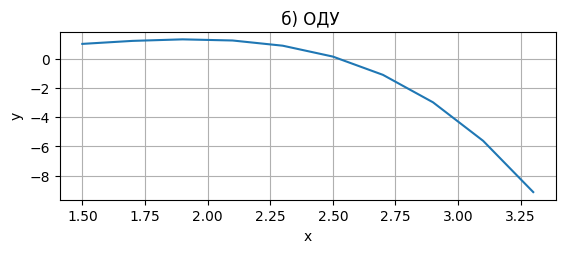

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def func2(x, y):
  func2_v = y + x ** 2 * np.cos(x)
  return func2_v

def euler_method(f, x0, y0, h):
    x_values = [x0]
    y_values = [y0]

    for _ in range(3):
        x0 += h
        y0 += h * f(x0, y0)
        x_values.append(x0)
        y_values.append(y0)

    return x_values, y_values

def run_kut_method(f, x0, y0, h):
    x_values = [x0]
    y_values = [y0]

    for _ in range(3):
        k1 = h * f(x0, y0)
        k2 = h * f(x0 + h / 2, y0 + k1 / 2)
        k3 = h * f(x0 + h / 2, y0 + k2 / 2)
        k4 = h * f(x0 + h, y0 + k3)

        x0 += h
        y0 += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x_values.append(x0)
        y_values.append(y0)

    return x_values, y_values

def solve_with_scipy(f, x0, y0, h):


    t_span = (x0, x0 + 2)
    t_eval = np.arange(x0, x0 + 2, h)
    sol = solve_ivp(f, t_span, [y0], t_eval=t_eval)

    return sol.t, sol.y[0]

v, u, o, j = 1, 1, 1, 1
x0 = 3 + v + 0.1 * u
y0 = 2 + o + 0.1 * j
h = 0.2
x01 = 0.5 * (o + j + 1)
y01 = (v + u) / 2



x_euler, y_euler = euler_method(func2, x01, y01, h)

x_rk, y_rk = run_kut_method(func2, x01, y01, h)

x_scipy2, y_scipy2 = solve_with_scipy(func2, x01, y01, h)

print("Метод Эйлера:")
for x, y in zip(x_euler, y_euler):
    print(f"x = {x:.2f}, y = {y:.2f}")

print("\nМетод Рунге-Кутты:")
for x, y in zip(x_rk, y_rk):
    print(f"x = {x:.2f}, y = {y:.2f}")


fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x_scipy2, y_scipy2, label="solve_ivp")
plt.title(' б) ОДУ')
plt.grid(True)
plt.show()
